# Models for Expected Tickets

Started with some non-probability-informed exponential model (`ticket_model_0`), then moved to one where we have a distribution for day and minute (`ticket_model_1`).

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import matplotlib.pyplot as plt
# from vis import *
from tickets import *
from minutes import *
from models import *

Pickle for breakup_prob_hist is up to date.
Pickle for expected_tickets is up to date.


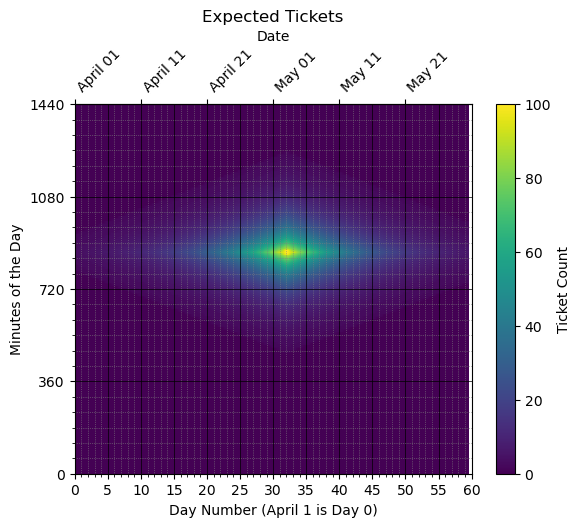

In [6]:
m = Models(model_id=0)
m.plot(1)

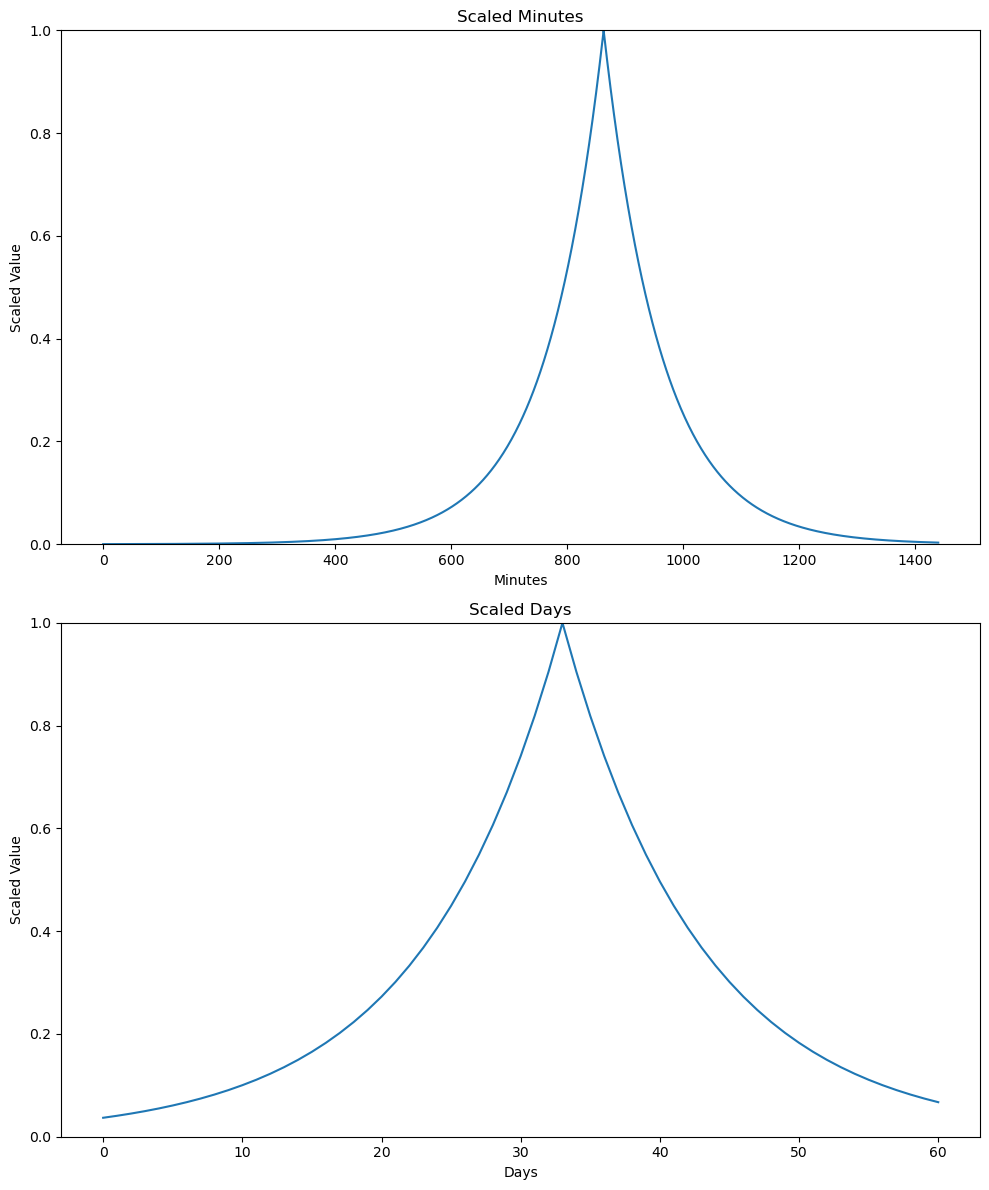

In [7]:
expected_tickets, scale_day, scale_minute = m.ticket_model_0(m.ticket_model_dict)

reference_day = m.ticket_model_dict["references"][0]
reference_min = m.ticket_model_dict["references"][1]

# def scale_minute(minute, scaling_factor=0.01):
#     if minute <= reference_min:
#         return nm.exp(-scaling_factor * (reference_min - minute))
#     else:
#         return nm.exp(-scaling_factor * (minute - reference_min))
    
# def scale_day(day, scaling_factor=0.1):
#     if day <= reference_day:
#         return nm.exp(-scaling_factor * (reference_day - day))
#     else:
#         return nm.exp(-scaling_factor * (day - reference_day))
    


fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Scaled minutes subplot
minutes = np.arange(0, 1441)
scaled_minutes = [scale_minute(minute) for minute in minutes]
axs[0].plot(minutes, scaled_minutes)
axs[0].set_title('Scaled Minutes')
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Scaled Value')

# Scaled days subplot
days = np.arange(0, 61)
scaled_days = [scale_day(day) for day in days]
axs[1].plot(days, scaled_days)
axs[1].set_title('Scaled Days')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Scaled Value')


# Set y-limits for all subplots
for ax in axs:
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [8]:
# def expected_tickets(day, min, ticket_limits=[0,100], thresholds=[.02, .90]):
#     day_scale = scale_day(day)
#     min_scale = scale_minute(min)
#     scale = day_scale*min_scale
#     # print(f"day scale: {day_scale:0.5f}")
#     # print(f"min scale: {min_scale:0.5f}")
#     # print(f"combined scale: {scale:0.5f}")
#     if scale < thresholds[0]:
#         return ticket_limits[0]
#     elif scale > thresholds[1]:
#         return ticket_limits[1]
#     else:
#         return int(round(scale*(ticket_limits[1]-ticket_limits[0]) + ticket_limits[0]))
    
print(expected_tickets(33, 863))
print(m.get_expected_tickets(33, 863))

100
100


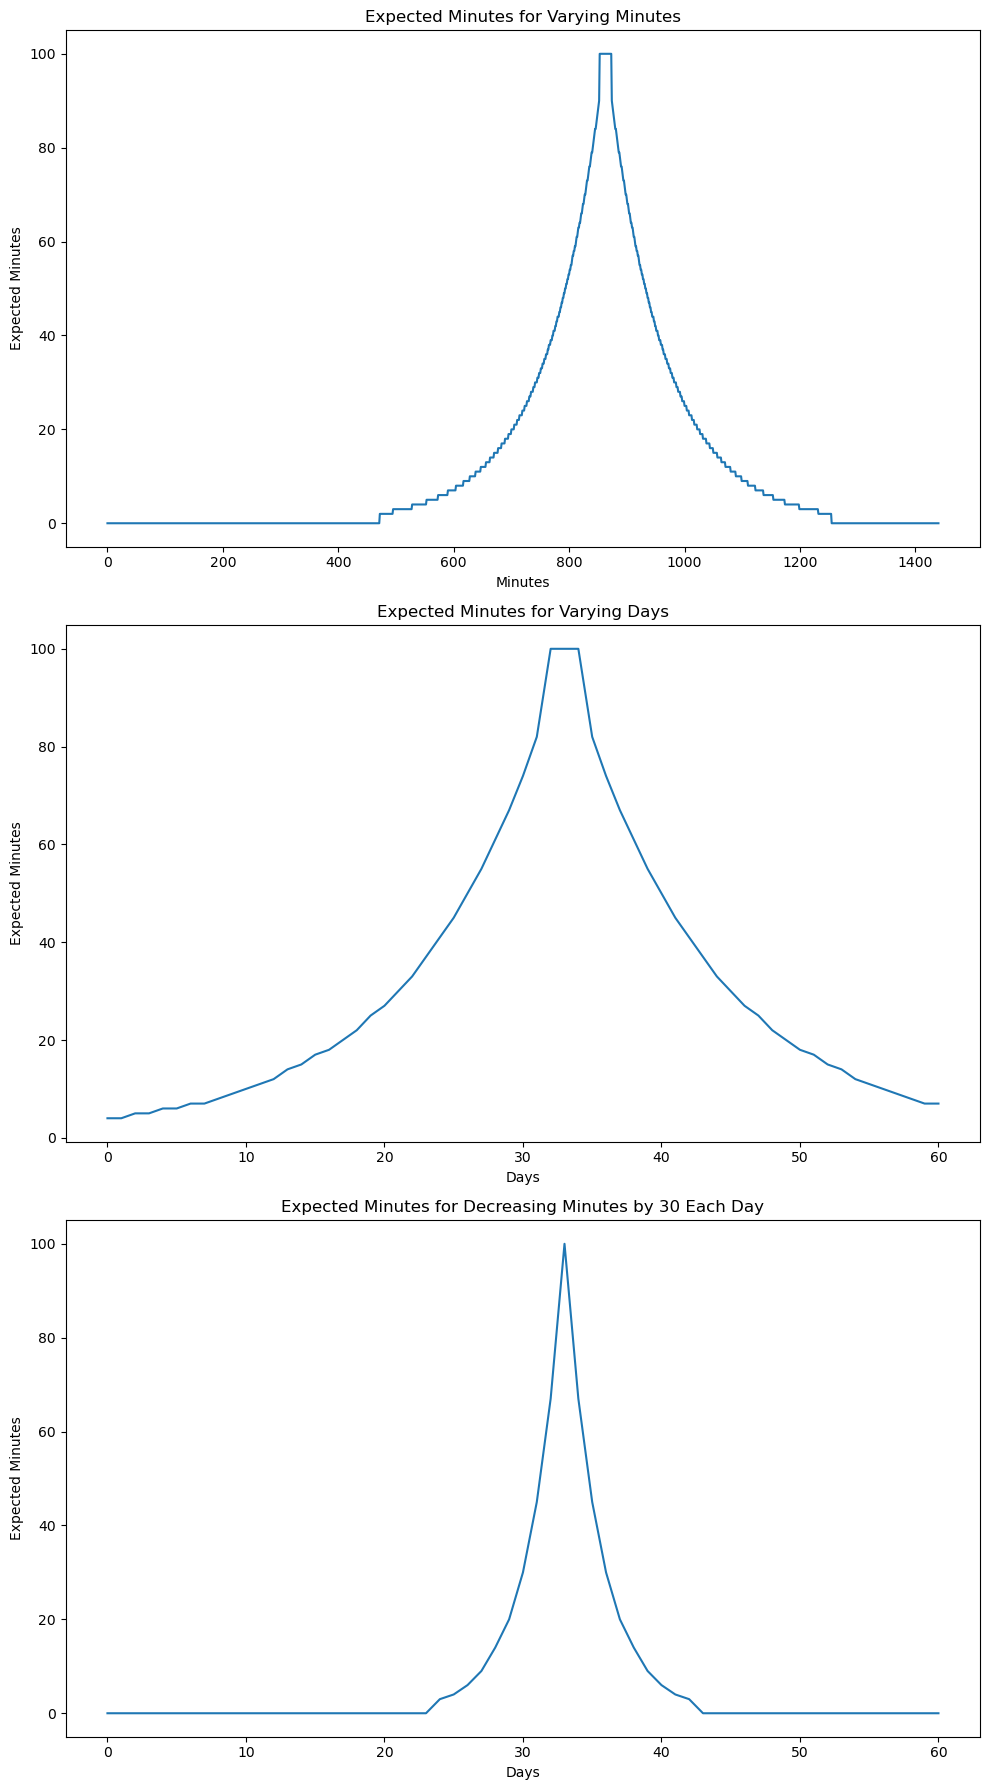

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Expected minutes subplot for varying minutes
expected_tickets_for_minutes = [expected_tickets(reference_day, minute) for minute in minutes]
axs[0].plot(minutes, expected_tickets_for_minutes)
axs[0].set_title('Expected Minutes for Varying Minutes')
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Expected Minutes')

# Expected minutes subplot for varying days
expected_tickets_for_days = [expected_tickets(day, reference_min) for day in days]
axs[1].plot(days, expected_tickets_for_days)
axs[1].set_title('Expected Minutes for Varying Days')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Expected Minutes')

# Expected minutes subplot for decreasing minutes by 30 each day
decreasing_minutes = [reference_min - 30 * (day - reference_day) for day in days]
expected_tickets_for_decreasing_minutes = [expected_tickets(day, minute) for day, minute in zip(days, decreasing_minutes)]
axs[2].plot(days, expected_tickets_for_decreasing_minutes)
axs[2].set_title('Expected Minutes for Decreasing Minutes by 30 Each Day')
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Expected Minutes')

plt.tight_layout()
plt.show()

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    By <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE Team</a>
    &copy; 2024 TU Delft. 
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a>.
    <a rel="Zenodo DOI" href="https://doi.org/10.5281/zenodo.16782515"><img style="width:auto; height:15; vertical-align:middle" src="https://zenodo.org/badge/DOI/10.5281/zenodo.16782515.svg" alt="DOI https://doi.org/10.5281/zenodo.16782515"></a>
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->